### Download the data

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数
start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '1H',
             'start_date':20180101000000}
Time_dict = ds.bar_reader(path,props)
print(time()-start)

8.039781093597412


In [3]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1H = HFDataView()

In [4]:
dv1H.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

Initialize dataview success.


### Calculate the Signal

Mastatistic is the use of many pairs of averages to do the score, Golden Fork for 1, dead fork for 0

### 1.Define calcuate to rate the average

In [6]:
import talib as ta
import numpy as np
import pandas as pd
def calculate(close, timePeriod):
    mas = ta.MA(close.iloc[:,0].values, timePeriod)
    mal = ta.MA(close.iloc[:,0].values, 5*timePeriod)
    df = pd.DataFrame({'long': mal, 'short': mas}, index=close.index).dropna()
    df['direction'] = list(map(lambda s, l: 1 if s > l else 0, df['short'], df['long']))
    return df['direction']

In [7]:
dv1H.get_ts('close',date_type='datetime').tail()

symbol,BTCUSDT:binance
trade_date,
2018-09-21 19:00:00,6742.23
2018-09-21 20:00:00,6732.02
2018-09-21 21:00:00,6727.83
2018-09-21 22:00:00,6721.59
2018-09-21 23:00:00,6682.97


In [8]:
dv1H.get_ts('close',date_type='datetime').iloc[:,0].values

array([13836.  , 13762.99, 13737.1 , ...,  6727.83,  6721.59,  6682.97])

In [9]:
dvClose = dv1H.get_ts('close',date_type='datetime').dropna()
x = np.array(range(1,21,1))
signalDf = pd.DataFrame({t: calculate(dvClose, t) for t in x})

In [10]:
signalDf

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
trade_date,,,,,,,,,,,,,,,,,,,,
2018-01-01 04:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 05:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 06:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 07:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 08:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 09:00:00,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 10:00:00,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 11:00:00,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 12:00:00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.The addition of the signal to the total multiplication

In [11]:
signalDf['signal'] = pd.Series({name: true.sum()*5 for name, true in signalDf.iterrows()}) 

In [12]:
signalDf['signal']

trade_date
2018-01-01 04:00:00      5.0
2018-01-01 05:00:00      5.0
2018-01-01 06:00:00      0.0
2018-01-01 07:00:00      0.0
2018-01-01 08:00:00      0.0
2018-01-01 09:00:00      0.0
2018-01-01 10:00:00      0.0
2018-01-01 11:00:00      0.0
2018-01-01 12:00:00      5.0
2018-01-01 13:00:00      5.0
2018-01-01 14:00:00     10.0
2018-01-01 15:00:00      5.0
2018-01-01 16:00:00      5.0
2018-01-01 17:00:00     10.0
2018-01-01 18:00:00      5.0
2018-01-01 19:00:00      0.0
2018-01-01 20:00:00      0.0
2018-01-01 21:00:00      0.0
2018-01-01 22:00:00      0.0
2018-01-01 23:00:00      5.0
2018-01-02 00:00:00      0.0
2018-01-02 01:00:00      0.0
2018-01-02 02:00:00      5.0
2018-01-02 03:00:00     10.0
2018-01-02 04:00:00     10.0
2018-01-02 05:00:00     15.0
2018-01-02 06:00:00     20.0
2018-01-02 07:00:00     20.0
2018-01-02 08:00:00     25.0
2018-01-02 09:00:00     30.0
                       ...  
2018-09-20 18:00:00     95.0
2018-09-20 19:00:00    100.0
2018-09-20 20:00:00    100.0
201

In [13]:
dv1H.get_ts('close',date_type='datetime')

symbol,BTCUSDT:binance
trade_date,
2018-01-01 00:00:00,13836.00
2018-01-01 01:00:00,13762.99
2018-01-01 02:00:00,13737.10
2018-01-01 03:00:00,13780.16
2018-01-01 04:00:00,13971.95
2018-01-01 05:00:00,13940.99
2018-01-01 06:00:00,13820.50
2018-01-01 07:00:00,13716.36
2018-01-01 08:00:00,13529.01


### 3.Drawing observation

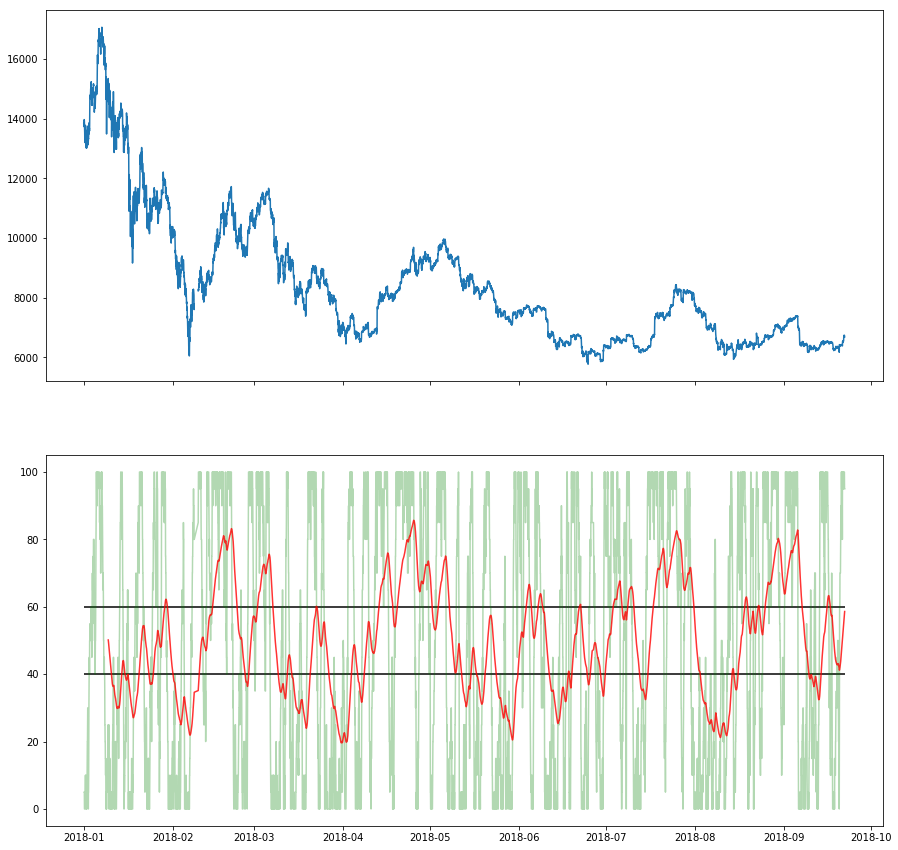

In [14]:
import matplotlib.pyplot as plt
from talib import abstract
fig, (ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
ax.plot(dv1H.get_ts('close',date_type='datetime'))
ax1.plot(signalDf['signal'], 'g', alpha=0.3)
ax1.plot(abstract.EMA(signalDf,200,price='signal'), 'r', alpha=0.8)
ax1.hlines(60, signalDf['signal'].index[0], signalDf['signal'].index[-1])
ax1.hlines(40, signalDf['signal'].index[0], signalDf['signal'].index[-1])
plt.show()

### 4.Define Signal Events

In [15]:
def signalAppend(signalDf):
    signalDf['time'] = signalDf.index
    signalDf["trade_date"] = signalDf['time'].apply(lambda x:int(x.strftime(format="%Y-%m-%d %H:%M:%S").replace("-","").replace(":","").replace(" ","")))
    signalDf["symbol"] = "BTCUSDT:binance"
    signalDf = signalDf.set_index(["trade_date","symbol"])
    signalSe = signalDf.signal.unstack()
    dv1H.append_df(signalSe,'signalSe')
signalAppend(signalDf)

Add total multiplication, more than 60 points more, 40 points below short

### 5.Set the incoming and outbound conditions

In [16]:
long = dv1H.add_formula('long','If((signalSe>=60) && (Delay(signalSe,1)<60), 2, 0)', add_data=True)
short = dv1H.add_formula('short','If((signalSe<=40) && (Delay(signalSe,1)>40), -2, 0)', add_data=True)
closeLong = dv1H.add_formula('closeLong','If(short==-2,1,0)', add_data=True)
closeShort = dv1H.add_formula("closeShort",'If(long==2,-1,0)', add_data=True)

### 6.Calculate performance

In [17]:
from jaqs_fxdayu.research import TimingDigger
tdMaStatistic = TimingDigger(output_folder=".", output_format='pdf',signal_name='MaStatistic')
def TimingSignal(td, dv, mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称
    #多空分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts("long"),
        exit_signal=dv.get_ts("closeLong"),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )
    td.process_signal(
        enter_signal=dv.get_ts("short"),
        exit_signal=dv.get_ts("closeShort"),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )
TimingSignal(tdMaStatistic, dv1H, 100, 0.15, 0.7)

/anaconda3/envs/python36/lib/python3.6/site-packages/jaqs/research/signaldigger/plotting.py:10: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use('Agg')


Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%


In [18]:
tdMaStatistic.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               4.826 -10.177   1.163
p-value              0.000   0.000   0.248
mean                 0.068  -0.027   0.009
std                  0.079   0.019   0.069
info_ratio           0.853  -1.385   0.125
skewness             1.309  -0.686   2.130
kurtosis             0.565  -0.578   4.644
pct5                 0.002  -0.063  -0.060
pct25                0.008  -0.040  -0.032
pct50                0.037  -0.020  -0.010
pct75                0.090  -0.011   0.011
pct95                0.228  -0.003   0.177
occurance           33.000  55.000  88.000
win_ratio              NaN     NaN   0.375
win_mean/loss_mean     NaN     NaN   2.512


In [19]:
tdMaStatistic.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               6.566 -11.196   0.919
p-value              0.000   0.000   0.360
mean                 0.068  -0.030   0.006
std                  0.060   0.021   0.062
info_ratio           1.143  -1.483   0.096
skewness             0.672  -1.049   1.346
kurtosis            -0.803   0.797   1.316
pct5                 0.003  -0.067  -0.062
pct25                0.019  -0.041  -0.030
pct50                0.050  -0.026  -0.013
pct75                0.109  -0.015   0.022
pct95                0.180  -0.006   0.149
occurance           34.000  58.000  92.000
win_ratio              NaN     NaN   0.370
win_mean/loss_mean     NaN     NaN   2.237


In [20]:
tdMaStatistic.create_event_report(sig_type="long_short")#同时计算多空头信号的绩效

*****-Summary-*****
Event Analysis
                       win     loss      all
t-stat               7.880  -15.138    1.482
p-value              0.000    0.000    0.140
mean                 0.068   -0.029    0.007
std                  0.070    0.020    0.065
info_ratio           0.970   -1.430    0.111
skewness             1.145   -0.892    1.799
kurtosis             0.467    0.297    3.381
pct5                 0.002   -0.065   -0.061
pct25                0.008   -0.041   -0.031
pct50                0.044   -0.024   -0.011
pct75                0.099   -0.013    0.020
pct95                0.193   -0.004    0.172
occurance           67.000  113.000  180.000
win_ratio              NaN      NaN    0.372
win_mean/loss_mean     NaN      NaN    2.362
